<a href="https://colab.research.google.com/github/massontl/ITAI-1372-Introduction-to-Machine-Learning/blob/main/Module%202%3A%20Assignment%20-%20Real-world%20Application%20of%20Supervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Description**: The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

# Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

# The data set was generated by a Monte Carlo program, Corsika, described in:
#    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
##    Forschungszentrum Karlsruhe FZKA 6019 (1998).
# http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

# The program was run with parameters allowing to observe events with energies down to below 50 GeV.

# **Problem Statement**: To build a predictive model that can differentiate between gamma rays and hadrons based on observed features.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **Data Preprocessing**

In [19]:
# Load the dataset
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=columns)

# Convert class labels to binary
df['class'] = (df['class'] == 'g').astype(int)

# Display the first few rows to ensure the dataset is loaded correctly
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(columns=['class'])
y = df['class']

# Split the data into training, validation, and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, valid = train_test_split(train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# **Model Training**

In [11]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1344
           1       0.85      0.90      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.82      3804
weighted avg       0.83      0.83      0.83      3804

Accuracy: 0.8346477392218717


In [12]:
# SVM

from sklearn.svm import SVC

# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Support Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1344
           1       0.89      0.90      0.89      2460

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

Accuracy: 0.86198738170347


## **Model Evaluation**

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate Decision Tree, use the fitted model 'best_dt_model'
dt_results = evaluate_model(best_dt_model, X_test, y_test) # Changed dt_model to best_dt_model
print(f"Decision Tree - Accuracy: {dt_results[0]}, Precision: {dt_results[1]}, Recall: {dt_results[2]}, F1 Score: {dt_results[3]}")

# Evaluate SVM
svm_results = evaluate_model(svm_model, X_test, y_test)
print(f"SVM - Accuracy: {svm_results[0]}, Precision: {svm_results[1]}, Recall: {svm_results[2]}, F1 Score: {svm_results[3]}")

Decision Tree - Accuracy: 0.8346477392218717, Precision: 0.8544328300425862, Recall: 0.8971544715447154, F1 Score: 0.8752726551655761
SVM - Accuracy: 0.86198738170347, Precision: 0.8893360160965795, Recall: 0.8983739837398373, F1 Score: 0.8938321536905967


# **Comparative Analysis**

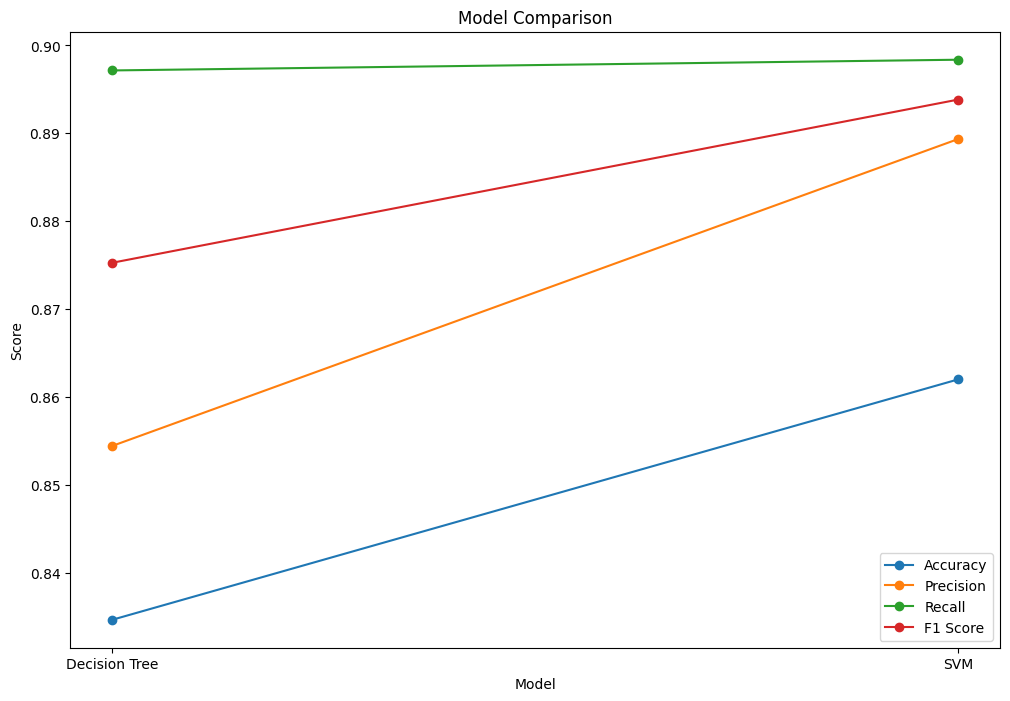

Decision Tree:
- Strengths: Easy to interpret, handles both numerical and categorical data, requires little data preprocessing.
- Weaknesses: Prone to overfitting, sensitive to noisy data.
SVM:
- Strengths: Effective in high-dimensional spaces, versatile with different kernel functions.
- Weaknesses: Requires careful tuning of hyperparameters, can be computationally intensive, less effective on large datasets with noise.


In [18]:
models = ['Decision Tree', 'SVM']
accuracy_scores = [dt_results[0], svm_results[0]]
precision_scores = [dt_results[1], svm_results[1]]
recall_scores = [dt_results[2], svm_results[2]]
f1_scores = [dt_results[3], svm_results[3]]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(models, accuracy_scores, label='Accuracy', marker='o')
plt.plot(models, precision_scores, label='Precision', marker='o')
plt.plot(models, recall_scores, label='Recall', marker='o')
plt.plot(models, f1_scores, label='F1 Score', marker='o')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Discussion of strengths and weaknesses
print("Decision Tree:")
print("- Strengths: Easy to interpret, handles both numerical and categorical data, requires little data preprocessing.")
print("- Weaknesses: Prone to overfitting, sensitive to noisy data.")

print("SVM:")
print("- Strengths: Effective in high-dimensional spaces, versatile with different kernel functions.")
print("- Weaknesses: Requires careful tuning of hyperparameters, can be computationally intensive, less effective on large datasets with noise.")